In [12]:
import pandas as pd #data analysis library
import matplotlib.pyplot as plt #graphing
import seaborn as sns #graphing
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np

poke_df = pd.read_csv("Pokemon.csv")
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [13]:
poke_stats = ['HP', "Attack", "Defense", "Speed"]


In [14]:
poke_df = poke_df.drop(columns = ['#','Name', 'Type 1', 'Type 2', 'Total', 'Sp. Atk', 'Sp. Def', 'Generation', "Legendary"])
poke_df.head()

,HP,Attack,Defense,Speed
0,45,49,49,45
1,60,62,63,60
2,80,82,83,80
3,80,100,123,80
4,39,52,43,65


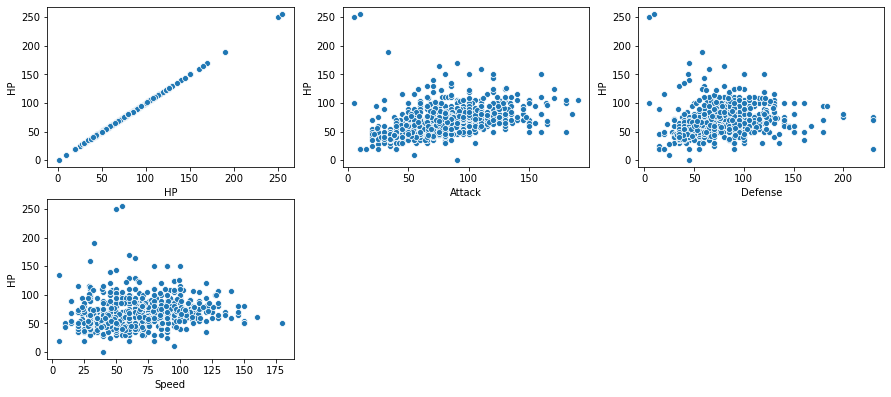

In [15]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')

In [21]:
#preprocessing independent variables
x = poke_df.iloc[:,1:4] 
print(x)
atk = poke_df.iloc[:,1]
dfs = poke_df.iloc[:,2]
spd = poke_df.iloc[:,3]


     Attack  Defense  Speed
0        49       49     45
1        62       63     60
2        82       83     80
3       100      123     80
4        52       43     65
..      ...      ...    ...
795     100      150     50
796     160      110    110
797     110       60     70
798     160       60     80
799     110      120     70

[800 rows x 3 columns]
0       49
1       62
2       82
3      100
4       52
      ... 
795    100
796    160
797    110
798    160
799    110
Name: Attack, Length: 800, dtype: int64


In [22]:
#preprocessing dependent variables
y = poke_df.iloc[:,0]
print (y)

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64


In [23]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) #20% testing

In [24]:
import statsmodels.api as sm

In [25]:
x_train = sm.add_constant(x_train) #add constant term
#y_train.values.reshape(-1,1)
#y_train = list(y_train)

In [26]:
#regression and fit
result = sm.OLS(y_train, x_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     HP   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     39.92
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           1.21e-23
Time:                        11:06:10   Log-Likelihood:                -2934.0
No. Observations:                 640   AIC:                             5876.
Df Residuals:                     636   BIC:                             5894.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.0542      3.322     12.961      0.0

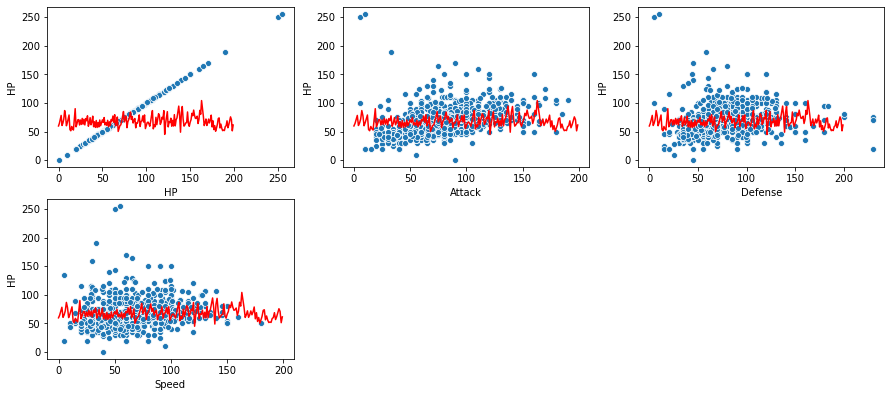

In [31]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')
    px = np.arange(0,200,1)
    bias = 43.0542
    py = (0.2940 * atk[px]) + (.0421 * dfs[px]) + (.0089*spd[px]) + bias
    plt.plot(py, 'r')
    plt.show

In [46]:
x_test = sm.add_constant(x_test)
ypred = result.predict(x_test)
print(ypred)
print(y_test)

227    74.895472
474    65.065344
497    79.139545
68     50.365900
101    65.666909
         ...    
263    81.329570
202    55.471783
418    78.481098
27     73.138219
81     76.133516
Length: 160, dtype: float64
227     65
474     55
497     70
68      25
101     60
      ... 
263    115
202     35
418     80
27      65
81      55
Name: HP, Length: 160, dtype: int64


In [47]:
from sklearn import metrics
#calculating errors
metrics.mean_absolute_error(y_test, ypred) #Absolute error

14.866703112071274

In [48]:
metrics.mean_squared_error(y_test, ypred) #MSE

420.33685248791414

In [50]:
np.sqrt(metrics.mean_squared_error(y_test,ypred)) #RMSE

20.502118243925775